In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
mu, sigma = 0., 1. # mean and standard deviation
data = np.random.normal(mu, sigma, 100000)

In [3]:
mu, sigma = 10., 3. # mean and standard deviation
data2 = np.random.normal(mu, sigma, 5000)

In [4]:
data3 = np.random.lognormal(0,0.5,100000)

(array([1.0000e+00, 1.5000e+01, 7.4000e+01, 2.6000e+02, 8.0200e+02,
        2.3400e+03, 5.2230e+03, 9.4850e+03, 1.4250e+04, 1.7546e+04]),
 array([-4.54531847e+00, -4.09078775e+00, -3.63625704e+00, -3.18172632e+00,
        -2.72719560e+00, -2.27266489e+00, -1.81813417e+00, -1.36360345e+00,
        -9.09072739e-01, -4.54542023e-01, -1.13065102e-05]),
 <a list of 10 Patch objects>)

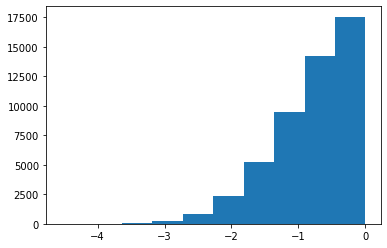

In [5]:
plt.hist(data[data<0.0])

(array([0.00141223, 0.01006215, 0.04316131, 0.09470774, 0.13451501,
        0.09691435, 0.0424552 , 0.01571107, 0.00203008, 0.00035306]),
 array([-0.31699741,  1.9489208 ,  4.21483901,  6.48075723,  8.74667544,
        11.01259365, 13.27851186, 15.54443007, 17.81034828, 20.07626649,
        22.34218471]),
 <a list of 10 Patch objects>)

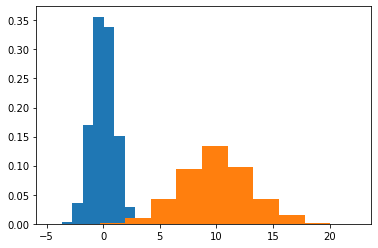

In [6]:
plt.hist(data,density=True)
plt.hist(data2,density=True)

In [7]:
import seaborn as sns

In [113]:
def plot_QQ(distribution, axs=None, **kwargs):

    """
    Plot to show coefficients
    :param coeffs: list of coefficient values
    :param cols: list of features
    :param axs: matplotlib axis if using one from a preexisting plot
    :param **kwargs: other keywords
    """

    sns.set_style("whitegrid")

    if axs == None:
        fig, axs = plt.subplots(1, 1, figsize=(kwargs.get("fig_x", 7),kwargs.get("fig_y", 7)))
        
    normal = np.random.normal(0., 1., 100000)
    
    
    def get_stat_tests(data):
        shapiro_statistic, shapiro_p = stats.shapiro(data)
        
        if shapiro_p <= 0.05:
            shap_out = "Not normal"
        else:
            shap_out = "Normal"
            
        and_stat, and_crit, and_sig = stats.anderson(data)
        
        for i,crit in enumerate(and_crit):
            if and_stat > crit:
                and_out = "Not Normal to >"+str(and_sig[i])+"% significance"
                break;
        else:
            and_out = "Normal"
        
        return shap_out, and_out
        
    
    shap_out, and_out = get_stat_tests(distribution)
    
    axs.text(0.45,0.11, "Shapiro-Wilk test: "+shap_out, transform=axs.transAxes, fontsize = 14)
    axs.text(0.45,0.07, "Anderson-Darling test: "+and_out, transform=axs.transAxes, fontsize = 14, wrap=True)
    
    #ax.text(0.4, 0.7, 'Correct Position', transform=ax.transAxes)
    
    
    def get_quantiles(data):
        q = []
        for i in np.arange(0.01, 1.00, 0.01):
            q.append(np.quantile(data,i))
        return q
    
    q1 = get_quantiles(normal)
    q2 = get_quantiles(distribution)
    
    axs.scatter(q1, q2)

    straight_x = np.linspace(*axs.get_xlim())
    straight_y = np.linspace(*axs.get_ylim())
    #ax.axline([0, 0], [1, 1])
    axs.plot(straight_x, straight_y, c='k', linestyle='--')
    
    axs.set_xlim(kwargs.get("xmin", None), kwargs.get("xmax", None))
    axs.set_ylim(kwargs.get("ymin", None), kwargs.get("ymax", None))
    axs.set_xlabel(kwargs.get("xlabel","Theoretical Quantiles"), fontsize=kwargs.get("label_fontsize",16))
    axs.set_ylabel(kwargs.get("ylabel","Sample Quantiles"), fontsize=kwargs.get("label_fontsize",16))
    axs.set_title(kwargs.get("title","QQ Plot"), fontsize=kwargs.get("title_fontsize",18))
    axs.tick_params(axis='both', which='major', labelsize=kwargs.get("major_tick_fontsize",15))
    axs.tick_params(axis='both', which='minor', labelsize=kwargs.get("minor_tick_fontsize",15))

    try:
        return fig, axs
    except:
        return axs


/Users/scottclay/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


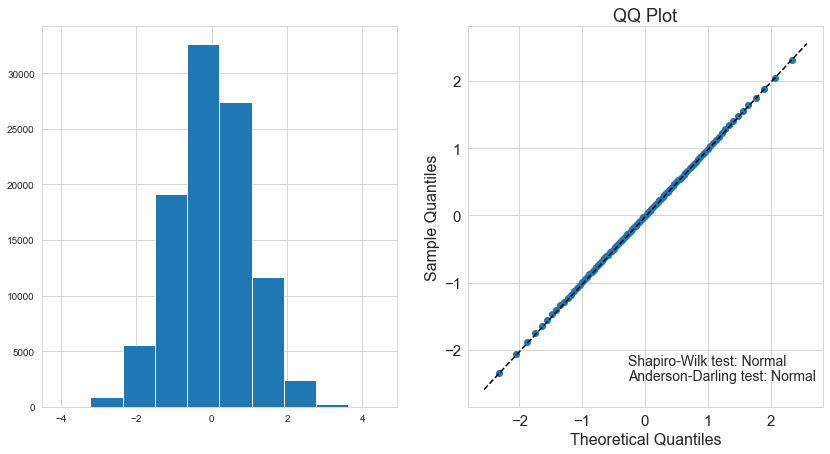

In [122]:
fig,axs = plt.subplots(1,2,figsize=(14,7))
axs[0].hist(data)
plot_QQ(data, axs=axs[1])

/Users/scottclay/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


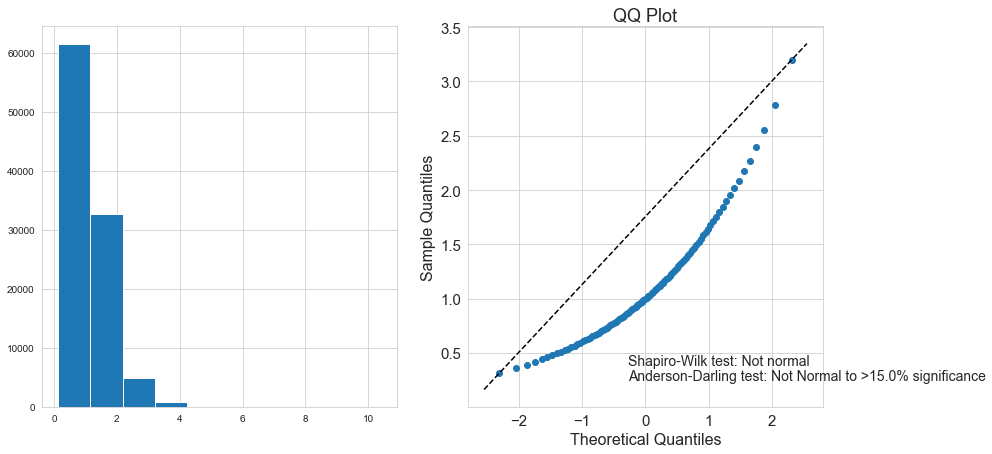

In [123]:
fig,axs = plt.subplots(1,2,figsize=(14,7))
axs[0].hist(data3)
plot_QQ(data3, axs=axs[1])

/Users/scottclay/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8406ed81d0>)

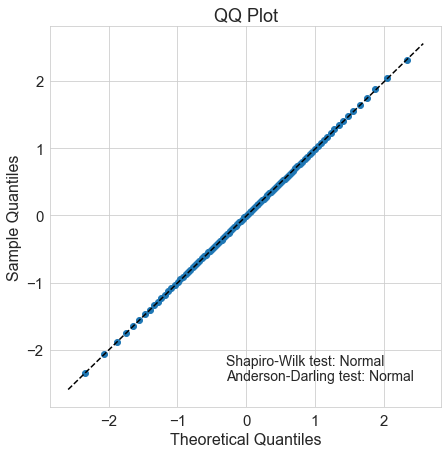

In [114]:
plot_QQ(data)

/Users/scottclay/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f84066de5d0>)

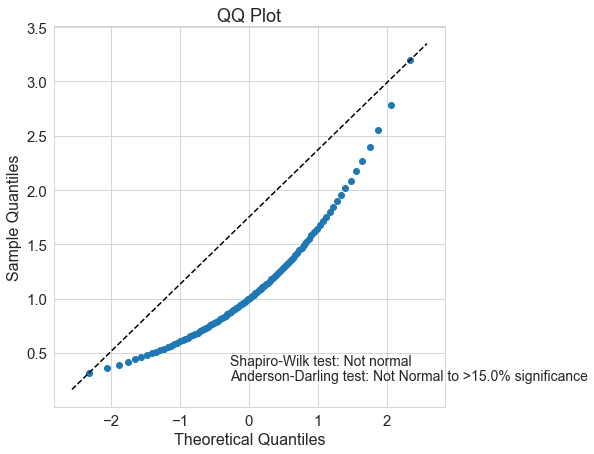

In [115]:
plot_QQ(data3)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8420a63d10>)

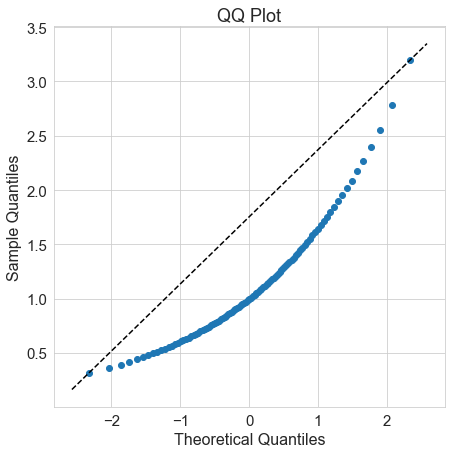

In [11]:
plot_QQ(data3)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8420edf590>)

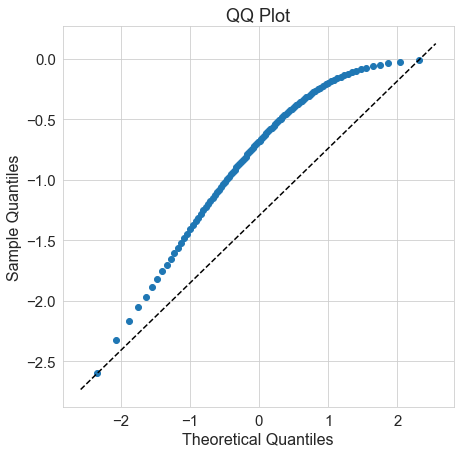

In [12]:
plot_QQ(data[data<0.0])

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f842180e710>)

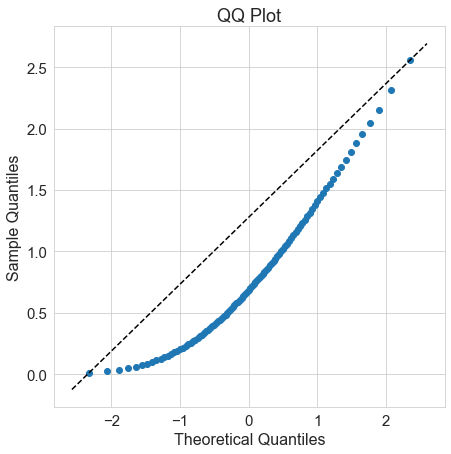

In [13]:
plot_QQ(data[data>0.0])

In [16]:
from scipy import stats

In [17]:
stats.anderson()

<function scipy.stats.morestats.anderson(x, dist='norm')>

In [49]:
and_stat, and_crit, and_sig = stats.anderson(data)

In [50]:
and_stat, and_crit, and_sig

(0.5571174673968926,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [51]:
crit

0.576

In [53]:
for i,crit in enumerate(and_crit):
    if and_stat > crit:
        print(and_sig[i]) 
        out = "Not Normal to >"+str(and_sig[i])+"% significance"
        break;
else:
    out = "Normal"
        
out

'Normal'

In [73]:
print(*stats.shapiro(data))
#print(*stats.kstest(data,'norm',N=len(data)))
print(stats.anderson(data))

0.9999662637710571 0.46612095832824707
AndersonResult(statistic=0.28754155535716563, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [160]:
print(*stats.shapiro(data2))
print(*stats.kstest(data2,'norm',N=len(data2)))
print(stats.anderson(data2))

0.9997754693031311 0.9038777947425842
0.9908708117171967 0.0
AndersonResult(statistic=0.22304368944151065, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [161]:
print(*stats.shapiro(data[data>0.0]))
print(*stats.kstest(data[data>0.0],'norm',N=len(data[data>0.0])))
print(stats.anderson(data[data>0.0]))

0.9267486333847046 0.0
0.5000045846713186 0.0
AndersonResult(statistic=883.0961748684058, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [109]:
print(*stats.shapiro(data3))
print(*stats.kstest(data3,'norm',N=len(data3)))
print(stats.anderson(data3))

0.8801332116127014 0.0
0.6227825123564383 0.0
AndersonResult(statistic=2466.795828305796, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


/Users/scottclay/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [163]:
print(*stats.shapiro(xxx))
print(*stats.kstest(xxx,'norm',N=len(xxx)))
print(stats.anderson(xxx))

0.984716534614563 0.30293598771095276
0.8254205261767246 1.066959180966916e-75
AndersonResult(statistic=0.5001392452270323, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [140]:
stats.shapiro(xxx)

(0.984716534614563, 0.30293598771095276)

In [141]:
stats.shapiro(data[data>0.0])

/Users/scottclay/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9267486333847046, 0.0)

In [142]:
stats.shapiro(data[data>0.0])

(0.9267486333847046, 0.0)

In [143]:
stats.shapiro(data2)

(0.9997754693031311, 0.9038777947425842)

In [144]:
stats.shapiro(data3)

(0.8805972337722778, 0.0)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb88801d450>)

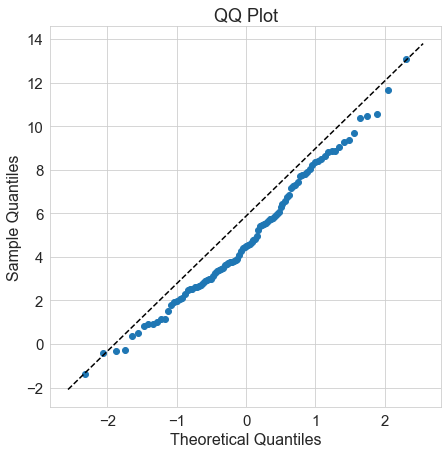

In [139]:
plot_QQ(xxx)

(array([ 5.,  8., 16., 20., 19.,  9., 14.,  6.,  1.,  2.]),
 array([-1.80136906, -0.2296655 ,  1.34203807,  2.91374163,  4.48544519,
         6.05714875,  7.62885232,  9.20055588, 10.77225944, 12.343963  ,
        13.91566657]),
 <a list of 10 Patch objects>)

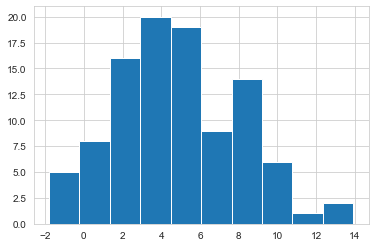

In [138]:
xxx = stats.norm.rvs(loc=5, scale=3, size=100)
plt.hist(xxx)

In [1]:
QQ plots 

SyntaxError: invalid syntax (<ipython-input-1-181922d3710d>, line 1)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson